In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import pickle

In [2]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri

In [3]:
out = {'Austin-to-SanDiego' :pickle.load(open('../predictions/params-lr-tf-Austin-SanDiego-all.pkl','r')),
       'SanDiego-to-Austin':pickle.load(open('../predictions/params-lr-tf-SanDiego-Austin-all.pkl','r'))
iterations = {}
home = {}
season = {}
lr = {}


for train_percentage in [6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]:
    iterations[train_percentage] = {}
    for iters in [100, 700, 1300]:
        iterations[train_percentage][iters] = 0

    home[train_percentage] = {}
    for h in range(3,6):
        home[train_percentage][h] = 0

    season[train_percentage] = {}
    for s in range(2,5):
        season[train_percentage][s] = 0
        
    lr[train_percentage] = {}
    for l in [0.1, 0.5, 1, 2]:
        lr[train_percentage][l] = 0

    for random_seed in range(10):
        for loop in range(10):
            iterations[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Iterations']] += 1
            home[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Num home factors']] +=1
            season[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Num season factors']] +=1
            lr[train_percentage][out[2]['True']['False']['transfer'][train_percentage][random_seed][loop]['Learning Rate']] +=1

In [4]:
iterations = pd.DataFrame(iterations)

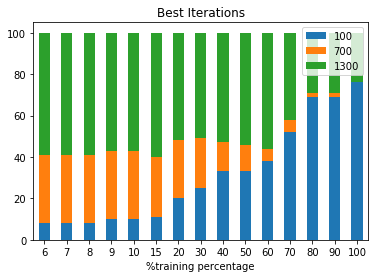

In [6]:
iterations.T.plot(kind='bar', stacked='True', title="Best Iterations", rot=0)
plt.xlabel("%training percentage")

In [7]:
home = pd.DataFrame(home)

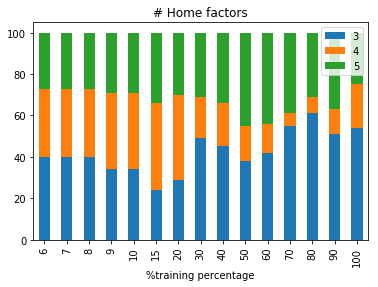

In [15]:
home.T.plot(kind='bar', stacked='True', title="# Home factors")
plt.xlabel("%training percentage")

In [9]:
season = pd.DataFrame(season)

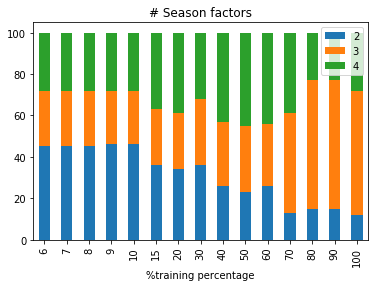

In [16]:
season.T.plot(kind='bar', stacked='True', title="# Season factors")
plt.xlabel("%training percentage")

In [11]:
lr = pd.DataFrame(lr)

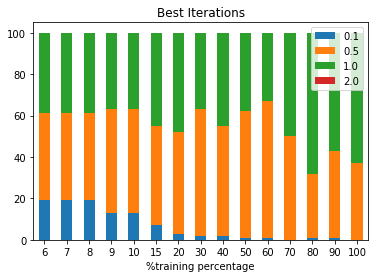

In [13]:
lr.T.plot(kind='bar', stacked='True', title="Best Iterations",rot=0)
plt.xlabel("%training percentage")

In [14]:
from plot_functions import format_axes, latexify

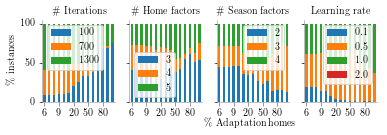

In [39]:
latexify(columns=2, fig_height=1.5, fig_width=6)
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True)
iterations.T.plot(kind='bar', stacked='True', title="\# Iterations", rot=0, ax=ax[0])
home.T.plot(kind='bar', stacked='True', title=r"\# Home factors",ax=ax[1], rot=0)
season.T.plot(kind='bar', stacked='True', title=r"\# Season factors", ax=ax[2],rot=0)
lr.T.plot(kind='bar', stacked='True', title="Learning rate",rot=0, ax=ax[3])
n = 3
for a in ax:
    format_axes(a)
ticks = ax[0].xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax[0].xaxis.get_ticklabels()]
ax[0].xaxis.set_ticks(ticks[::n])
ax[0].xaxis.set_ticklabels(ticklabels[::n])
f = fig.text(0.5, -0.1, "\% Adaptation homes")
l = ax[0].set_ylabel("\% instances")
plt.savefig('../figures/params-Austin-SD.pdf',bbox_inches="tight",bbox_extra_artists=[f, l])

In [31]:
ticks[::n]

array([0])